In [45]:
#Start of Y2 Model 
seismic_data = pd.read_csv('cleaned_seismic.csv')
seismic_data.head()
print(seismic_data.columns)

Index(['Seismic Zone', 'PGA (m/s²)', 'PGV (m/s)', 'PGD (m)',
       'Spectral Acceleration (g)', 'Soil Type', 'Site Amplification Factor',
       'Historical Earthquake Magnitude (Mw)', 'Fault Distance (km)',
       'Seismic Wave Frequency (Hz)', 'Building Height (m)',
       'Number of Stories', 'Structural Material', 'Foundation Type',
       'Natural Frequency (Hz)', 'Damping Ratio (%)', 'Mass of Structure (kg)',
       'Axial Stiffness (kN/m)', 'Bending Stiffness (kN·m²)',
       'Lateral Load Resisting System',
       'Predicted Max Inter-Story Drift Ratio (%)',
       'Predicted Max Roof Displacement (m)',
       'Predicted Base Shear Force (kN)',
       'Predicted Structural Acceleration (m/s²)',
       'Predicted Damage Index (0–1 Scale)',
       'Predicted Collapse Probability (%)', 'damage_index', 'collapse_prob',
       'collapse_risk'],
      dtype='object')


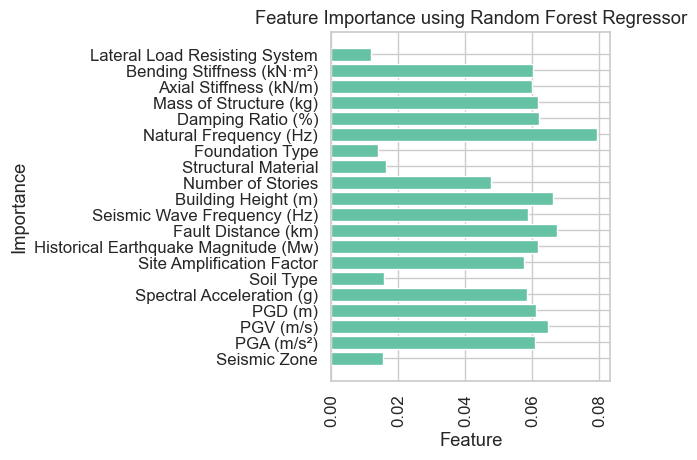

In [46]:
# Using Important Features using Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

x = seismic_data.drop(columns = ['Predicted Max Inter-Story Drift Ratio (%)','Predicted Max Roof Displacement (m)', 'Predicted Base Shear Force (kN)',
                                 'Predicted Structural Acceleration (m/s²)','Predicted Damage Index (0–1 Scale)','Predicted Collapse Probability (%)', 
                                 'damage_index', 'collapse_prob','collapse_risk'])
y = seismic_data['damage_index']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

randomforest = RandomForestRegressor(n_estimators = 500, random_state = 42)
randomforest.fit(x_train, y_train)

importantfeatures = randomforest.feature_importances_
feature_names = x.columns

plt.barh(feature_names, importantfeatures)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance using Random Forest Regressor')
plt.tight_layout()
plt.show()



In [48]:
pearson = x.corrwith(y, method='pearson')
print(pearson)





Seismic Zone                           -0.004867
PGA (m/s²)                             -0.024950
PGV (m/s)                               0.044336
PGD (m)                                -0.008122
Spectral Acceleration (g)               0.028015
Soil Type                              -0.002010
Site Amplification Factor               0.001277
Historical Earthquake Magnitude (Mw)   -0.018427
Fault Distance (km)                     0.038642
Seismic Wave Frequency (Hz)             0.008069
Building Height (m)                     0.002960
Number of Stories                       0.022780
Structural Material                    -0.025199
Foundation Type                        -0.008800
Natural Frequency (Hz)                  0.002390
Damping Ratio (%)                      -0.018028
Mass of Structure (kg)                  0.010324
Axial Stiffness (kN/m)                 -0.041899
Bending Stiffness (kN·m²)               0.028551
Lateral Load Resisting System           0.036207
dtype: float64


In [49]:
comparison_data = pd.DataFrame({ 'Feature': x.columns, 'Random Forest Importance': importantfeatures, 'Pearson Correlation': pearson})
comparison_data = comparison_data.sort_values(by='Random Forest Importance',ascending=False).reset_index(drop=True)
print(comparison_data.T)


                                              0                    1   \
Feature                   Natural Frequency (Hz)  Fault Distance (km)   
Random Forest Importance                0.079337             0.067311   
Pearson Correlation                      0.00239             0.038642   

                                           2          3                  4   \
Feature                   Building Height (m)  PGV (m/s)  Damping Ratio (%)   
Random Forest Importance             0.066204   0.064572           0.062096   
Pearson Correlation                   0.00296   0.044336          -0.018028   

                                                            5   \
Feature                   Historical Earthquake Magnitude (Mw)   
Random Forest Importance                              0.061828   
Pearson Correlation                                  -0.018427   

                                              6         7           8   \
Feature                   Mass of Structure (kg)   

In [50]:
importantfeatures_series = pd.Series(importantfeatures, index=feature_names)
top10importance = importantfeatures_series.sort_values(ascending=False).head(10)
print(top10importance)


Natural Frequency (Hz)                  0.079337
Fault Distance (km)                     0.067311
Building Height (m)                     0.066204
PGV (m/s)                               0.064572
Damping Ratio (%)                       0.062096
Historical Earthquake Magnitude (Mw)    0.061828
Mass of Structure (kg)                  0.061575
PGD (m)                                 0.061008
PGA (m/s²)                              0.060793
Bending Stiffness (kN·m²)               0.060324
dtype: float64


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

bins = [0, 0.25, 0.5, 0.75, 1.0]
labels = [0, 1, 2, 3]  # 0: low, 1: medium, 2: high
seismic_data['damage_indexnew'] = pd.cut(seismic_data['damage_index'], bins=bins, labels=labels)

top10_features = top10importance.index.tolist()
x = seismic_data[top10_features]
y = seismic_data['damage_indexnew'].astype(int)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


logistic = LogisticRegression(max_iter=1000, multi_class='multinomial')
logistic.fit(x_train, y_train)
y_pred = logistic.predict(x_test)


label_names = ['Low', 'Moderate', 'High', 'Very High']

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names = label_names))

[[ 7  5 10 18]
 [ 7  8 13 16]
 [ 6 10 23 15]
 [13 20 12 17]]
              precision    recall  f1-score   support

         Low       0.21      0.17      0.19        40
    Moderate       0.19      0.18      0.18        44
        High       0.40      0.43      0.41        54
   Very High       0.26      0.27      0.27        62

    accuracy                           0.28       200
   macro avg       0.26      0.26      0.26       200
weighted avg       0.27      0.28      0.27       200



c:\Users\SH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

bins = [0, 0.25, 0.5, 0.75, 1.0]
labels = [0, 1, 2, 3]

linear = LinearRegression()
linear.fit(x_train, y_train)
y_pred = linear.predict(x_test)

y_pred_classes = np.digitize(y_pred, bins) - 1

# Convert true values to classes as well
y_test_classes = np.digitize(y_test, bins) - 1

# Define class names for classification report
label_names = ['Low', 'Moderate', 'High', 'Very High']

# Now evaluate classification metrics
print(confusion_matrix(y_test_classes, y_pred_classes))
print(classification_report(y_test_classes, y_pred_classes))

[[  0  40]
 [  0 160]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           4       0.80      1.00      0.89       160

    accuracy                           0.80       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.64      0.80      0.71       200



c:\Users\SH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\SH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\SH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

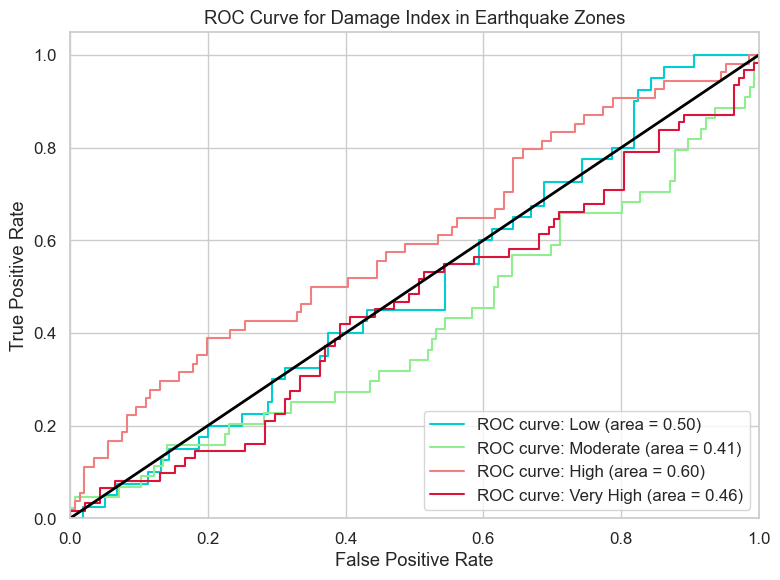

In [56]:
# ROC and AUC Curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
y_score = logistic.predict_proba(x_test)
n_classes = y_score.shape[1]

# 7. Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 8. Plot Multiclass ROC
colours = ['darkturquoise', 'lightgreen', 'lightcoral', 'crimson']
plt.figure(figsize=(8, 6))

for i, color in zip(range(n_classes), colours):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f'ROC curve: {label_names[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Damage Index in Earthquake Zones')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [57]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

svm_model = SVR(kernel='rbf')  # You can also try 'linear' or 'poly'
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)

# Evaluate SVM Regressor
print("SVM Regression Results:")
print(f"R^2 Score: {r2_score(y_test, svm_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, svm_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, svm_pred)):.4f}")

SVM Regression Results:
R^2 Score: -0.1996
MAE: 1.0407
RMSE: 1.2166


In [59]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)

# Evaluate XGBoost Regressor
print("XGBoost Regression Results:")
print(f"R^2 Score: {r2_score(y_test, xgb_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, xgb_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, xgb_pred)):.4f}")

XGBoost Regression Results:
R^2 Score: 0.0169
MAE: 0.9278
RMSE: 1.1014


In [70]:
bins = [0, 0.25, 0.5, 0.75, 1.0]
label_names = ['Low', 'Moderate', 'High', 'Very High']

y_test_clipped = np.clip(y_test, 0, 1)
svm_pred_clipped = np.clip(svm_pred, 0, 1)
xgb_pred_clipped = np.clip(xgb_pred, 0, 1)


y_test_classes = np.digitize(y_test_clipped, bins, right=True) - 1
svm_pred_classes = np.digitize(svm_pred_clipped, bins, right=True) - 1
xgb_pred_classes = np.digitize(xgb_pred_clipped, bins, right=True) - 1

y_test_classes = np.clip(y_test_classes, 0, len(bins) - 2)
svm_pred_classes = np.clip(svm_pred_classes, 0, len(bins) - 2)
xgb_pred_classes = np.clip(xgb_pred_classes, 0, len(bins) - 2)


In [71]:
print("Unique true classes:", np.unique(y_test_classes))
print("Unique SVM predicted classes:", np.unique(svm_pred_classes))
print("Unique XGBoost predicted classes:", np.unique(xgb_pred_classes))

Unique true classes: [0 3]
Unique SVM predicted classes: [1 2 3]
Unique XGBoost predicted classes: [0 1 2 3]


In [72]:
print("SVM Classification Report:")
print(confusion_matrix(y_test_classes, svm_pred_classes))
print(classification_report(
    y_test_classes, svm_pred_classes, labels=[0,1,2,3], target_names=label_names, zero_division=0))


SVM Classification Report:
[[  0   1   2  37]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   3 157]]
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00        40
    Moderate       0.00      0.00      0.00         0
        High       0.00      0.00      0.00         0
   Very High       0.81      0.98      0.89       160

    accuracy                           0.79       200
   macro avg       0.20      0.25      0.22       200
weighted avg       0.65      0.79      0.71       200



In [73]:
print("XGBoost Classification Report:")
print(confusion_matrix(y_test_classes, xgb_pred_classes))
print(classification_report(
    y_test_classes, xgb_pred_classes, labels=[0,1,2,3], target_names=label_names, zero_division=0))

XGBoost Classification Report:
[[  2   1   2  35]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   5 155]]
              precision    recall  f1-score   support

         Low       1.00      0.05      0.10        40
    Moderate       0.00      0.00      0.00         0
        High       0.00      0.00      0.00         0
   Very High       0.82      0.97      0.89       160

    accuracy                           0.79       200
   macro avg       0.45      0.25      0.25       200
weighted avg       0.85      0.79      0.73       200

